# Avacado project

### Problem statement 

### Avocado is a fruit consumed by people heavily in the United States. 

#### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#### Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


#### Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
df=pd.read_csv('avacado.csv')

## Exploratory Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

### Statistical summary

Summarizing your dataset through descriptive statistics, to use a variety of measurements to better understand your dataset.

##### shape function

shape function gives the dimention of dataframe

In [3]:
df.shape

(1517, 14)

we have 1517 rows and 14 columns in the data frame

##### head() function

head() function is to display the first 5 rows of dataframe

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### tail() function

tail() function is use to display last 5 row of data frame

In [5]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


#####  sample() function

sample() function is show the sample randomly

In [6]:
df.sample(12)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
39,39,29-03-2015,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany
766,6,15-11-2015,0.62,1010132.49,690246.77,244820.79,11412.94,63651.99,63178.20,473.79,0.00,conventional,2015,PhoenixTucson
1050,34,03-05-2015,0.78,6558729.33,3520801.33,2265493.71,58510.13,713924.16,546260.44,166650.78,1012.94,conventional,2015,SouthCentral
690,45,15-02-2015,1.29,2983695.90,88056.20,1958075.38,7773.07,929791.25,864046.29,65744.96,0.00,conventional,2015,Northeast
1263,45,15-02-2015,0.78,743066.25,520464.29,133695.54,12099.88,76806.54,73763.41,3043.13,0.00,conventional,2015,WestTexNewMexico
485,44,22-02-2015,1.34,127501.04,4269.36,80442.92,5161.84,37626.92,22828.92,13884.93,913.07,conventional,2015,Indianapolis
115,24,12-07-2015,1.10,850931.58,58827.99,547537.41,50679.01,193887.17,189236.32,4406.05,244.80,conventional,2015,BaltimoreWashington
1044,28,14-06-2015,0.69,7281803.61,4668964.65,1660109.04,77844.97,874884.95,716742.30,158100.12,42.53,conventional,2015,SouthCentral
1126,45,15-02-2015,1.23,169118.65,88022.48,33530.37,41.17,47524.63,47493.52,31.11,0.00,conventional,2015,StLouis
1412,4,27-11-2016,1.57,73261.05,1006.16,50581.93,12.21,21660.75,21641.31,0.00,19.44,conventional,2016,BuffaloRochester


##### dtypes function

dtypes is use to disply the datatype of data frame

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

here we have (Date,type,region) are object dtypes and remaining are float64 dtypes

 Finding Unique in object dtype columns

In [8]:
df['type'].unique()

array(['conventional'], dtype=object)

we have only one value for entire column there is no differnce if we drop

#### drop unnecessary

In [9]:
df=df.drop(['Unnamed: 0','type'],axis=1)

##### info() function

info() function gives the range of index,data coulmns count,column names, non-null count, dtype of dataframe,dtypes total and memory usage 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  year          1517 non-null   int64  
 11  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 142.3+ KB


here RangeIndex is 1517 entries,0 to 1516,we have total 14 columns, 9 columns are float64 dtype and 2 columns are int64 and 3 columns are object and 166 KB 

##### isnull() function

isnull() function is use to know the null values in data frame, it give th values True and False 

if value is True it indicates null vlaue,else it give false

In [11]:
df.isnull()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,False,False,False,False,False,False,False,False,False,False,False,False
1513,False,False,False,False,False,False,False,False,False,False,False,False
1514,False,False,False,False,False,False,False,False,False,False,False,False
1515,False,False,False,False,False,False,False,False,False,False,False,False


##### isnull().sum() function

isnull().sum() it give the count of null values present in column 

In [12]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

There is no null values in the data frame

### Describe the data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


observation:

1.In 4225 column mean value is more than 50th percentile(Median)

2.In XLargeBags column has large difference in 75th percentile and max value

3.In year column we have mean, min,25th percentile,50th percentile and 75th percentile all these values are 2015 and std is zero because we have only 2 values in that column 2015 and 2016 only 

### converting Date into Date dtype

In [14]:
df['Date'].dtypes

dtype('O')

In [15]:
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df['Date'].dtypes

dtype('<M8[ns]')

## Data Visualization

Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.


we are using two libraries 

1.matplotlib.pyplot

2.seaborn

### univariate plots

<AxesSubplot:>

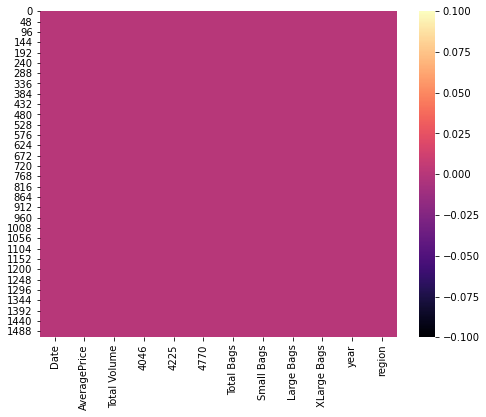

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='magma')

we have no null values thats why we got on color in plot if we have any null value we get differnt shade in plot

Text(0.5, 1.0, 'Total Volume')

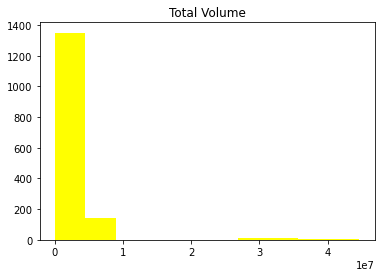

In [18]:
plt.hist(x='Total Volume',data=df,color='yellow')
plt.title("Total Volume")

<AxesSubplot:xlabel='4046'>

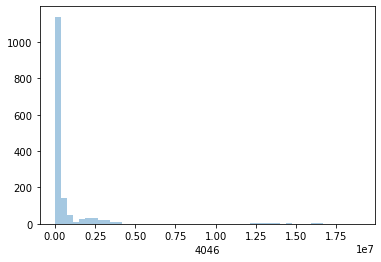

In [19]:
sns.distplot(a=df['4046'], kde=False)

### Bi-variate plot 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


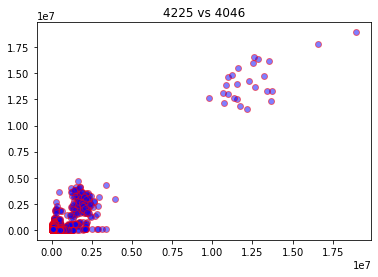

In [20]:
plt.scatter(df["4225"],df["4046"],alpha=0.5,c=(0,0,1),edgecolor='r')
plt.title("4225 vs 4046")
plt.show()

the dots in a scatter plot not only report the values of individual data points,but also patterens when the data are taken as a whole, indentification of correlation relationship are common with scatter plots. Here we can notice that good relation in both feature and outliers are present in the data

<AxesSubplot:xlabel='4225', ylabel='4770'>

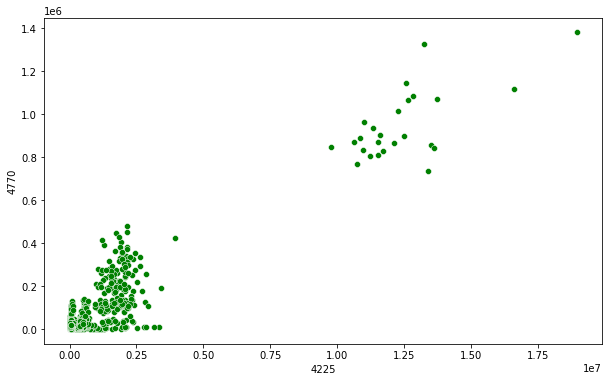

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['4225'], y=df['4770'],color='Green')

the dots in a scatter plot not only report the values of individual data points,but also patterens when the data are taken as a whole, indentification of correlation relationship are common with scatter plots. most of data distribution in both features from 0 to 0.5 and we have some data points ploted on x-axis 1 to 1.3 on y-axis 0.8 to 1.2

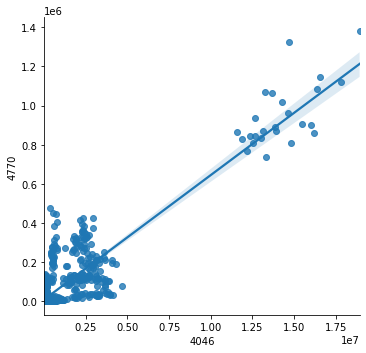

In [22]:
sns.lmplot(x="4046", y="4770",data=df,palette='magma_r')

regplot shows that no. of mutual exclusive options for estimating the linear regression in both features. here we have most of data ploted near 0 to 0.5 on both axis and few points are far from the data, notice as outliers

### multi-variate plot

In [23]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'],
      dtype='object')

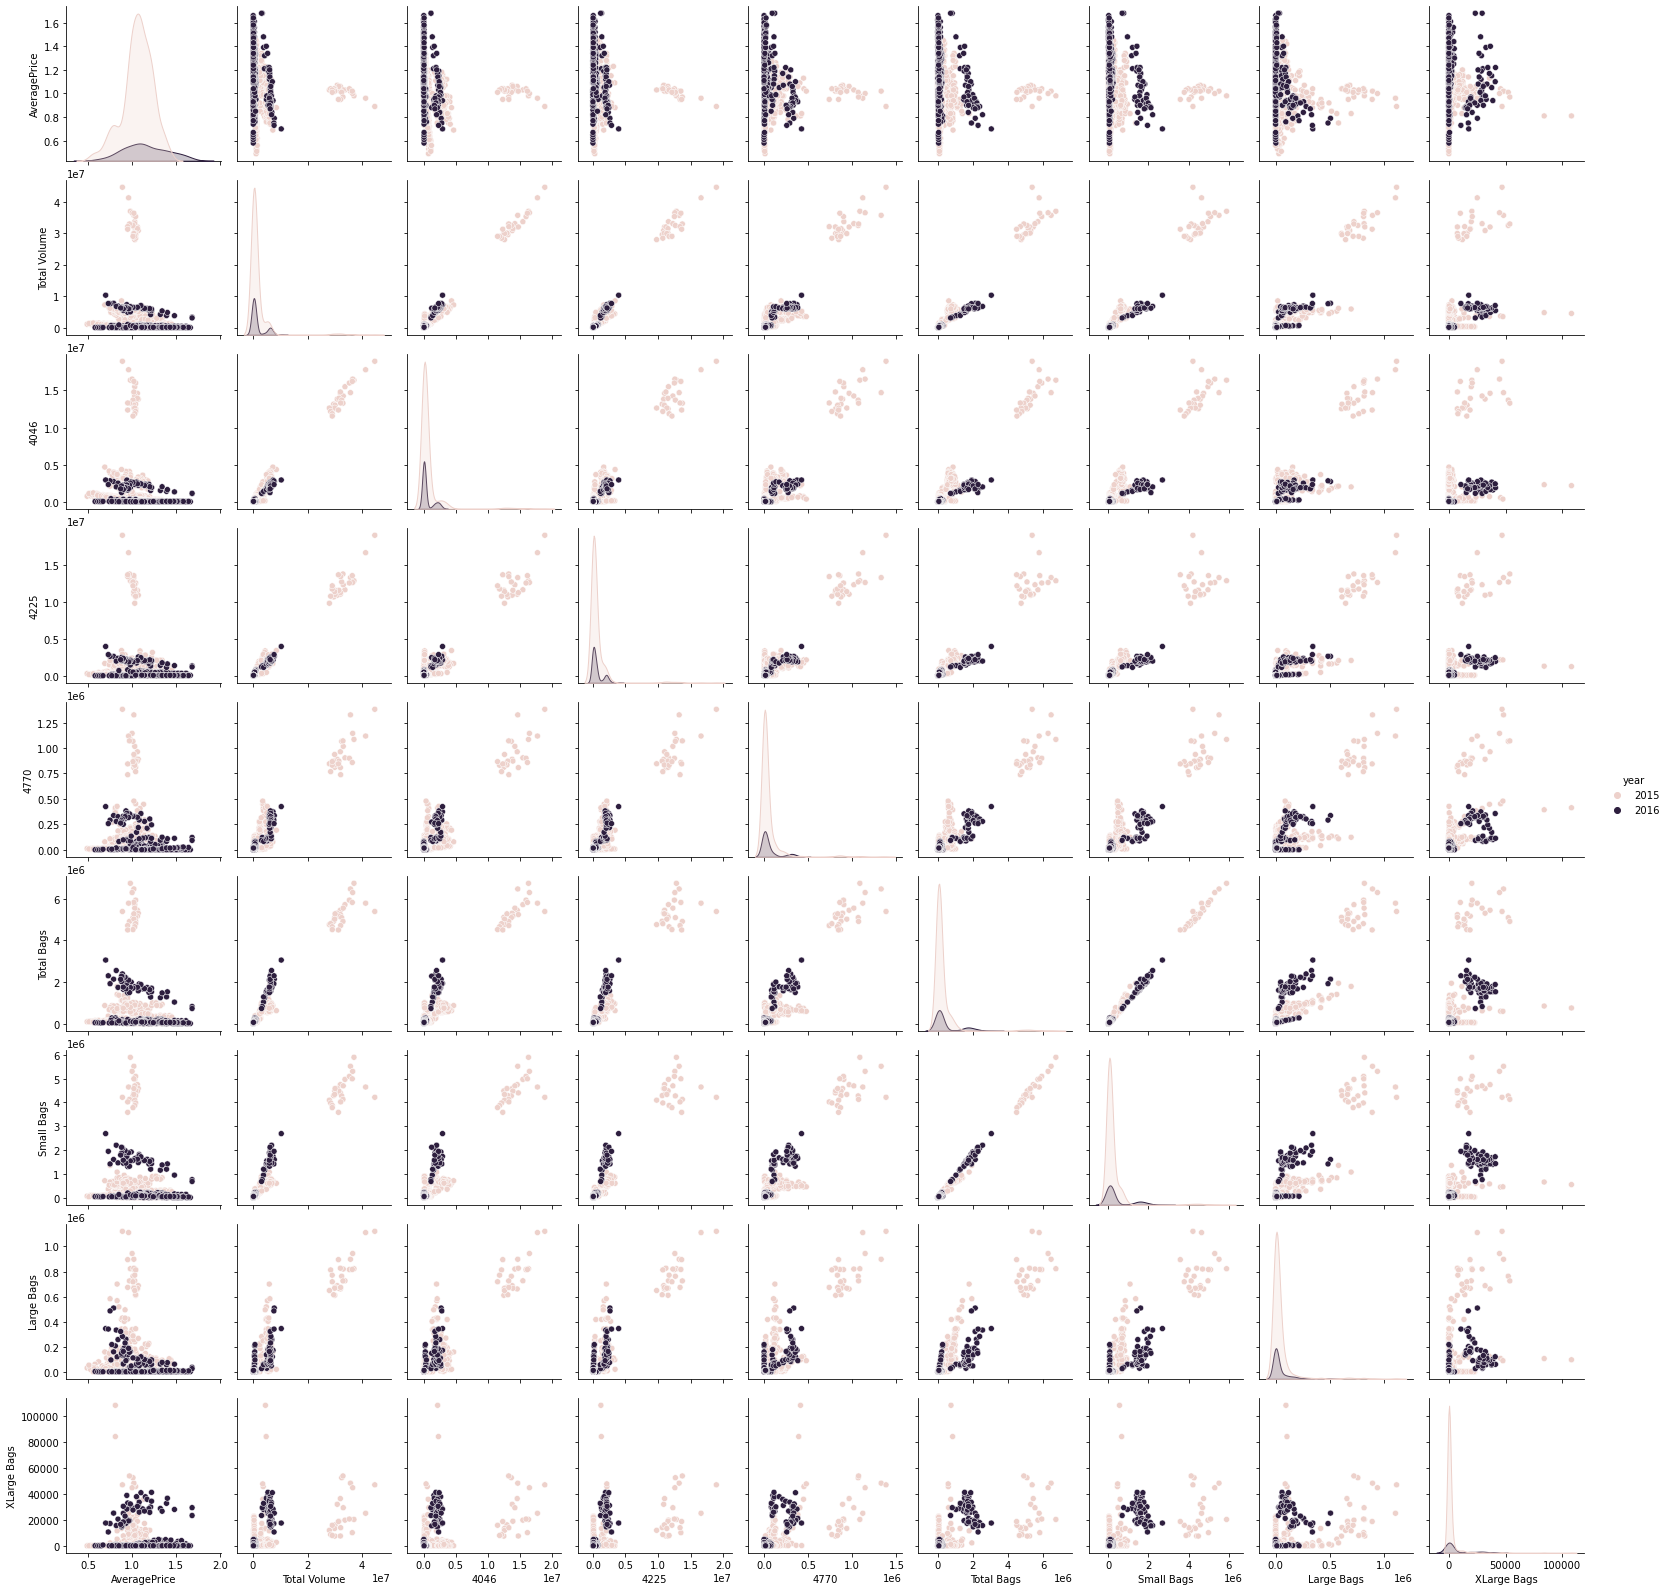

In [24]:
sns.pairplot(df,hue='year')

above plot we use hue as year column we can clearly observe that which year we have high sale and which year we have high costs 

### Correlaion

Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.This is when one variable increases while the other increases and visa versa

In [25]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


<AxesSubplot:>

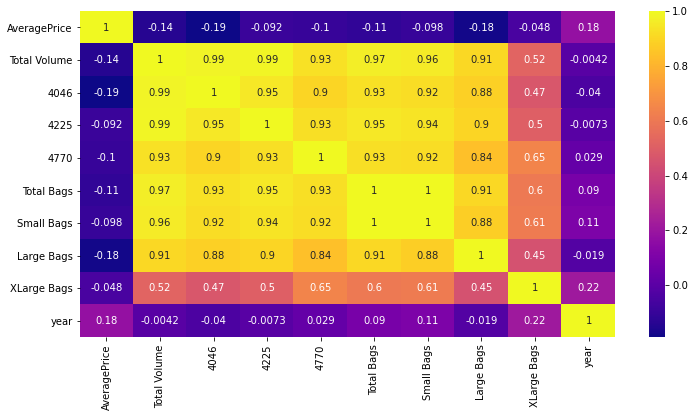

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(dfcor,cmap='plasma',annot=True)

all the columns are good correlations, for the target feature we  have week relation to each column, in this SmallBags XLarge Bags are near to zero correlation

##### dropingm unnessary columns

here we no need of Date,region and years column for futher precedure

In [27]:
df=df.drop(['Date','year','region'],axis=1)

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.Here we no need to plot Rings because it is a target variable

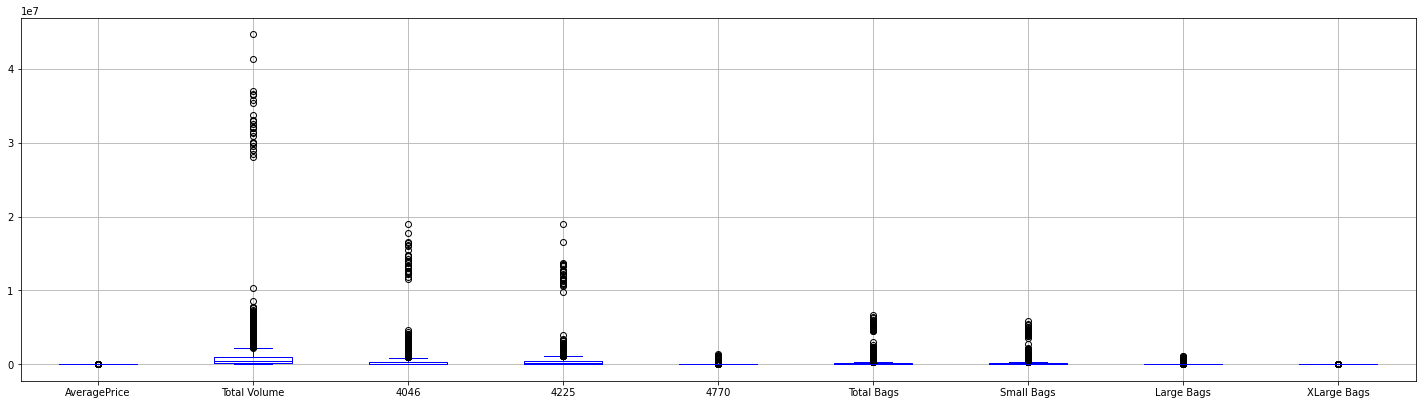

In [28]:
df.boxplot(figsize=(25,8),color='blue')
plt.subplots_adjust(bottom=0.25)
plt.show()

we have outliers in all the columns

### Define functions

In [29]:
def plot(data_frame,feature_name):
    sns.set(style = "darkgrid")
    plt.figure(figsize=(6,6))
    sns.distplot(data_frame[feature_name],color='orange')
    plt.figure(figsize=(6,6))
    sns.set(style = "whitegrid")
    sns.boxplot(data_frame[feature_name],color='olive')

In [30]:
def outlier_norm(data_frame,feature):
    uppper_boundary=data_frame[feature].mean() + 3* data_frame[feature].std()
    lower_boundary=data_frame[feature].mean() - 3* data_frame[feature].std()
    print("lower_boundary:",lower_boundary), print("uppper_boundary",uppper_boundary)

In [31]:
def outlier_IQR(data_frame,feature):
    IQR=data_frame[feature].quantile(0.75)-data_frame[feature].quantile(0.25)
    lower_boundary=data_frame[feature].quantile(0.25)-(IQR*1.5)
    upper_boundary=data_frame[feature].quantile(0.75)+(IQR*1.5)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)

In [32]:
def outlier_extreme(data_frame,feature):
    IQR=data_frame[feature].quantile(0.75)-data_frame[feature].quantile(0.25)
    lower_boundary=data_frame[feature].quantile(0.25)-(IQR*3)
    upper_boundary=data_frame[feature].quantile(0.75)+(IQR*3)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)

## Features

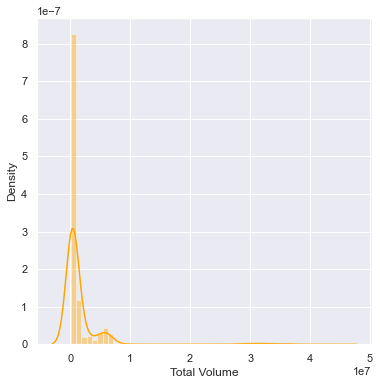

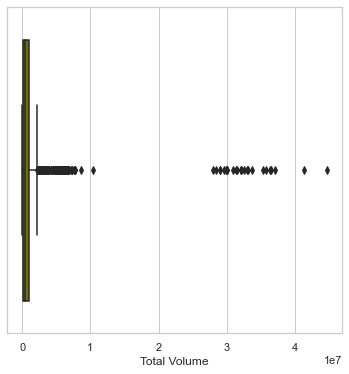

In [33]:
plot(df,'Total Volume')

we have right skewed distribution here and we have too many outliers

In [34]:
outlier_IQR(df,'Total Volume')

lower_boundary: -1104287.645
uppper_boundary 2233732.715


In [35]:
df.loc[df['Total Volume']>2233732.715,'Total Volume']=2233732.715

<AxesSubplot:xlabel='Total Volume'>

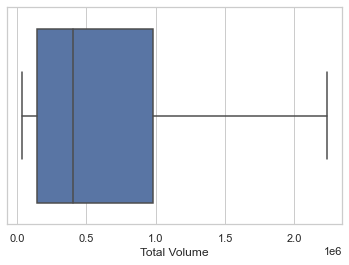

In [36]:
sns.boxplot(df['Total Volume'])

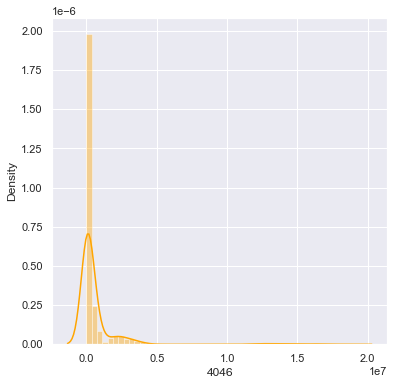

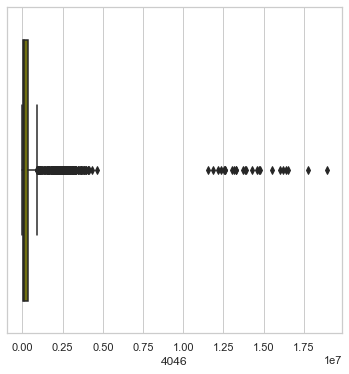

In [37]:
plot(df,'4046')

In 4046 feature data is right skewed and we have outliers in feature

In [38]:
outlier_IQR(df,'4046')

lower_boundary: -515366.86999999994
uppper_boundary 913345.69


In [39]:
df.loc[df['4046']>913345.69,'4046']=913345.69

<AxesSubplot:xlabel='4046'>

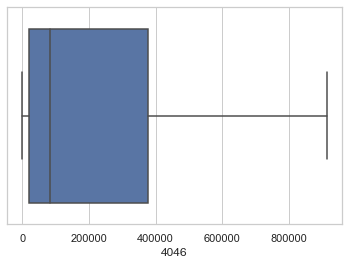

In [40]:
sns.boxplot(df['4046'])

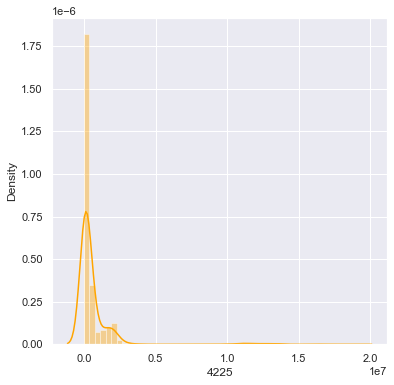

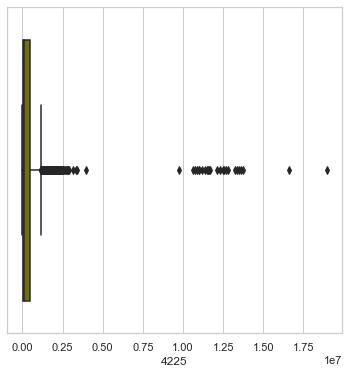

In [41]:
plot(df,'4225')

data distribution is right skewed and outliers are present in the feature

In [42]:
outlier_IQR(df,'4225')

lower_boundary: -624035.3600000001
uppper_boundary 1150661.76


In [43]:
df.loc[df['4225']>1150661.76,'4225']=1150661.76

<AxesSubplot:xlabel='4225'>

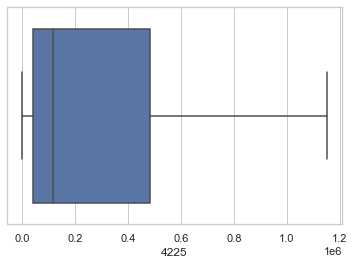

In [44]:
sns.boxplot(df['4225'])

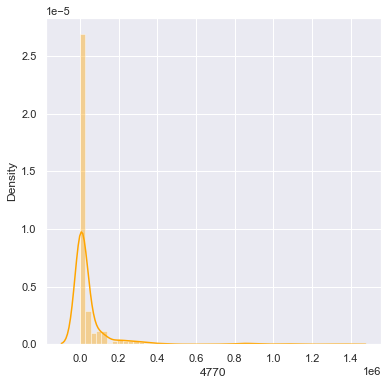

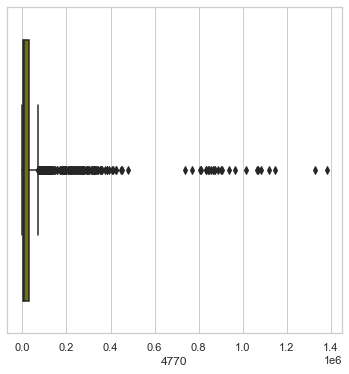

In [45]:
plot(df,'4770')

distribution is right skewed and presence of outliers

In [46]:
outlier_IQR(df,'4770')

lower_boundary: -41472.825
uppper_boundary 71551.375


In [47]:
df.loc[df['4770']>71551.375,'4770']=71551.375

<AxesSubplot:xlabel='4770'>

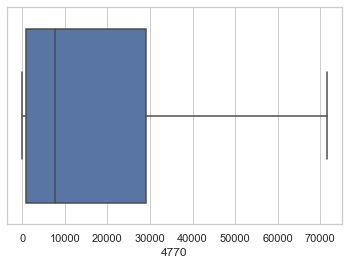

In [48]:
sns.boxplot(df['4770'])

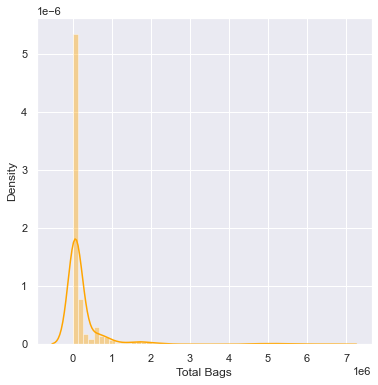

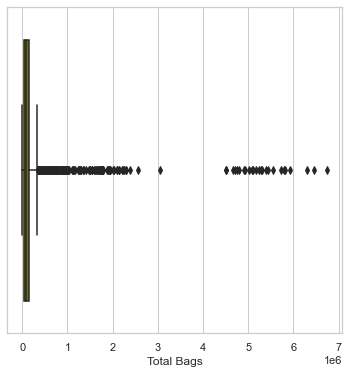

In [49]:
plot(df,'Total Bags')

data distribution is right distribution and outliers are present in column

In [50]:
outlier_IQR(df,'Total Bags')

lower_boundary: -145897.29499999998
uppper_boundary 339713.865


In [51]:
df.loc[df['Total Bags']>339713.865,'Total Bags']=339713.865

<AxesSubplot:xlabel='Total Bags'>

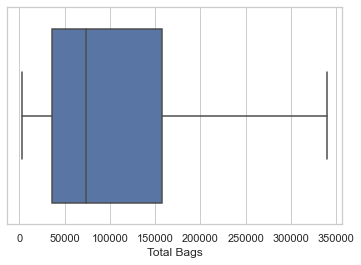

In [52]:
sns.boxplot(df['Total Bags'])

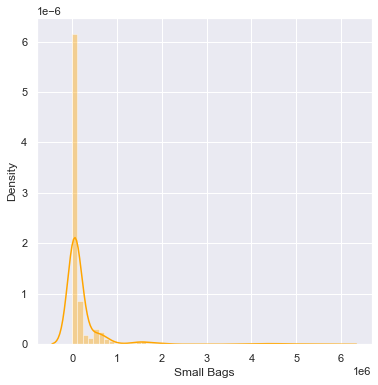

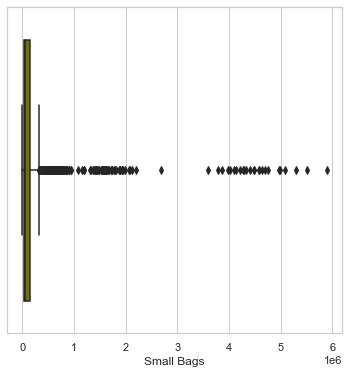

In [53]:
plot(df,'Small Bags')

data distribution is right skewed and outliers are present

In [54]:
outlier_IQR(df,'Small Bags')

lower_boundary: -144980.975
uppper_boundary 320907.54500000004


In [55]:
df.loc[df['Small Bags']>320907.54,'Small Bags']=320907.54

<AxesSubplot:xlabel='Small Bags'>

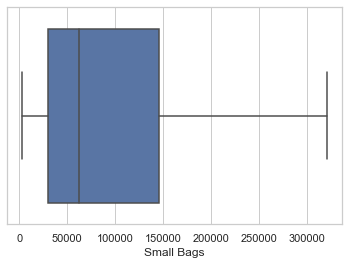

In [56]:
sns.boxplot(df['Small Bags'])

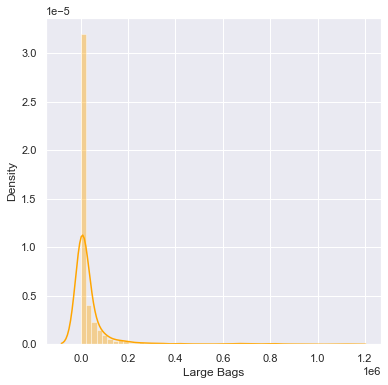

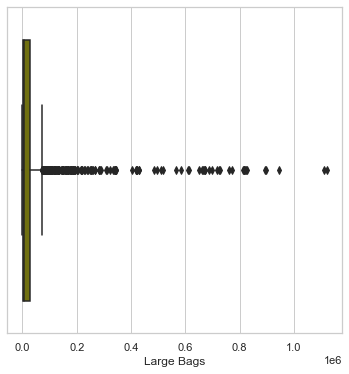

In [57]:
plot(df,'Large Bags')

data distribution is right skewed and outliers are present

In [58]:
outlier_IQR(df,'Large Bags')

lower_boundary: -42549.655
uppper_boundary 72358.065


In [59]:
df.loc[df['Large Bags']>72358.065,'Large Bags']=72358.065

<AxesSubplot:xlabel='Large Bags'>

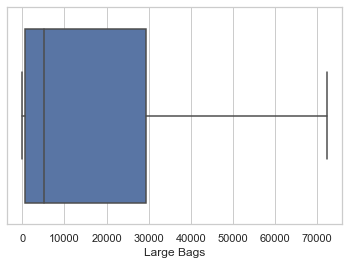

In [60]:
sns.boxplot(df['Large Bags'])

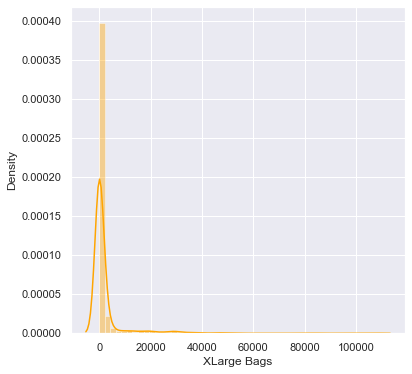

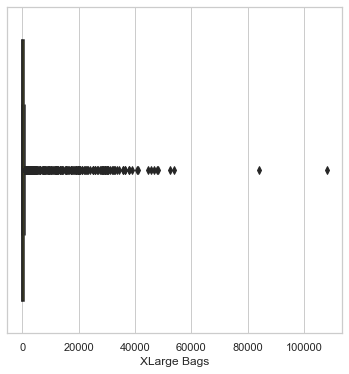

In [61]:
plot(df,'XLarge Bags')

data distribution is right skewed and outliers are present in the feature

In [62]:
outlier_IQR(df,'XLarge Bags')

lower_boundary: -602.22
uppper_boundary 1003.7


In [63]:
df.loc[df['XLarge Bags']>1003.7,'XLarge Bags']=1003.7

<AxesSubplot:xlabel='XLarge Bags'>

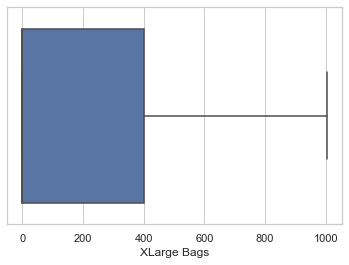

In [64]:
sns.boxplot(df['XLarge Bags'])

In [65]:
df.skew()

AveragePrice   -0.109444
Total Volume    1.176935
4046            1.212500
4225            1.220883
4770            1.170573
Total Bags      1.104160
Small Bags      1.166098
Large Bags      1.230728
XLarge Bags     1.178417
dtype: float64

## split the dependent and independent features

In [66]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

## Finding best random-state

In [67]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is",maxAccu,"on random_state", maxRS)

Best r2_score is 0.7823774263646456 on random_state 92


## apply train_test_split 

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=92)

In [69]:
x_train.shape

(1492, 8)

In [70]:
y_train.shape

(1492,)

In [71]:
x_test.shape

(25, 8)

In [72]:
y_test.shape

(25,)

## Apply models

In [73]:
def train_test(model):
    print("model name:",model)
    model.fit(x_train,y_train)
    #predict the validation data
    pred=model.predict(x_test)
    print("r2_score",r2_score(y_test,pred))
    print("error:")
    print("mean_squared_error:",mean_squared_error(y_test,pred))
    print("mean_absolute_error",mean_absolute_error(y_test,pred))
    print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,pred)))
    print("explained_variance_score:",explained_variance_score(y_test,pred))
    print("mean_poisson_deviance:",mean_poisson_deviance(y_test,pred))

In [74]:
def scr(model):
    scr=cross_val_score(model,x,y,cv=5)
    print("Cross validation score:",scr.mean())

## apply LinearRegression

In [75]:
train_test(LinearRegression())

model name: LinearRegression()
r2_score 0.7823774263646456
error:
mean_squared_error: 0.007035302560483739
mean_absolute_error 0.06390448562639907
sqrt_mean_squared_error 0.08387671047724594
explained_variance_score: 0.7978467329964147
mean_poisson_deviance: 0.006872441267611249


In [76]:
scr(LinearRegression())

Cross validation score: 0.24011961750826175


### Apply Lasso

In [77]:
train_test(Lasso())

model name: Lasso()
r2_score 0.7823274622618915
error:
mean_squared_error: 0.007036917799997569
mean_absolute_error 0.06433318308232129
sqrt_mean_squared_error 0.08388633857784931
explained_variance_score: 0.7973340449590511
mean_poisson_deviance: 0.0068720476114097285


In [78]:
scr(Lasso())

Cross validation score: 0.25072935388301315


### Apply Ridge

In [79]:
train_test(Ridge())

model name: Ridge()
r2_score 0.7823774263612095
error:
mean_squared_error: 0.007035302560594817
mean_absolute_error 0.06390448563355898
sqrt_mean_squared_error 0.0838767104779081
explained_variance_score: 0.7978467329862274
mean_poisson_deviance: 0.0068724412677141355


In [80]:
scr(Ridge())

Cross validation score: 0.2401196179483483


### Apply DecisionTreeRegressor

In [81]:
train_test(DecisionTreeRegressor())

model name: DecisionTreeRegressor()
r2_score 0.5062003151132842
error:
mean_squared_error: 0.01596355621301775
mean_absolute_error 0.0929384615384615
sqrt_mean_squared_error 0.1263469675655801
explained_variance_score: 0.5082491444937909
mean_poisson_deviance: 0.01421505165801924


In [82]:
scr(DecisionTreeRegressor())

Cross validation score: -0.7354315155569735


### Apply RandomForestRegressor

In [83]:
train_test(RandomForestRegressor())

model name: RandomForestRegressor()
r2_score 0.7382807138385084
error:
mean_squared_error: 0.0084608610830287
mean_absolute_error 0.06383485512425584
sqrt_mean_squared_error 0.09198293908670618
explained_variance_score: 0.7419583576229569
mean_poisson_deviance: 0.00738190587103654


In [84]:
scr(RandomForestRegressor())

Cross validation score: 0.09964082315113736


### Apply ElasticNet

In [85]:
train_test(ElasticNet())

model name: ElasticNet()
r2_score 0.7824430495004346
error:
mean_squared_error: 0.007033181095749947
mean_absolute_error 0.064118839416928
sqrt_mean_squared_error 0.08386406319604332
explained_variance_score: 0.7976801116081853
mean_poisson_deviance: 0.006869486234237803


In [86]:
scr(ElasticNet())

Cross validation score: 0.24556635819097447


After applying different machine learning algorithms we got Lasso is the best algorithms

## Hyper Parameter Tunning

In [87]:
parameters = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,1]}
gcv_lasso = GridSearchCV(Lasso(),param_grid=parameters,n_jobs=-1,cv=5,verbose=2)

gcv_lasso.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             verbose=2)

In [88]:
print('best_estimator',gcv_lasso.best_estimator_)
print('best_score_',gcv_lasso.best_score_)
# prediction on validation data
gcv_lasso_pred= gcv_lasso.predict(x_test)
print("accuracy of model :",r2_score(y_test,gcv_lasso_pred))

best_estimator Lasso(alpha=1e-05)
best_score_ 0.3848747990833691
accuracy of model : 0.7823778473431173


### Saving the model

In [89]:
import joblib
joblib.dump(gcv_lasso,"Avacado-project.pkl")

['Avacado-project.pkl']

## Loadig the saved model 

In [90]:
model=joblib.load("Avacado-project.pkl")

In [91]:
prediction=model.predict(x_test)

In [92]:
print(r2_score(y_test,prediction)*100)

78.23778473431173
